## Function Transform

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as stats

In [50]:
# read the titanic dataset
df = pd.read_csv('C:\\Data Science Preparation\\1_CampusX - end to end\\100 Days of Machine Learning\\Day29\\train.csv', 
                 usecols=['Age', 'Fare', 'Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [51]:
# filling in the missing values
df.isnull().sum()
# age has a lot of missing values

Survived      0
Age         177
Fare          0
dtype: int64

In [52]:
# instead of using a Imputer object you can just replace the NULL with mean
df['Age'].fillna(df['Age'].mean(), inplace=True)

In [53]:
# separate input and output
x = df.iloc[:, 1:3]
y = df.iloc[:, 0]  # survived

In [54]:
# train test split
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)
# random_state=42  means the split will be same if the cell is re-run

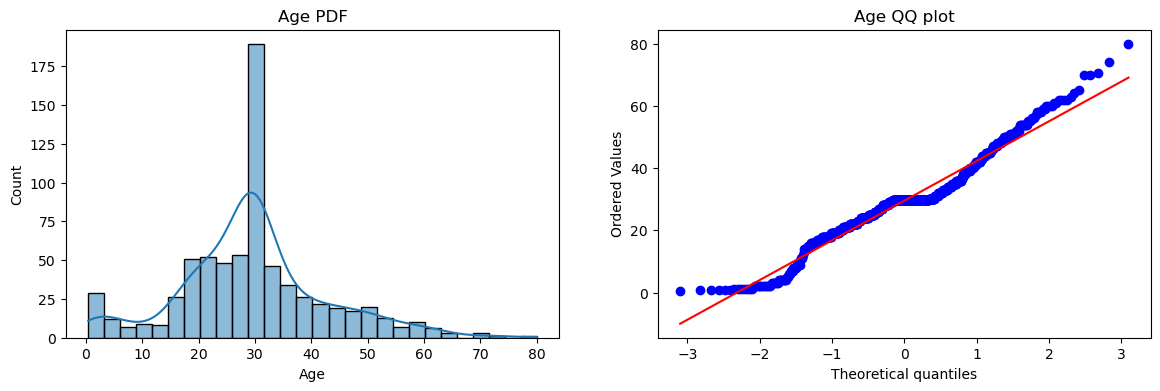

In [55]:
# check the distribution of age and fare
# AGE
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.histplot(x_train['Age'], kde=True)
plt.title('Age PDF')

plt.subplot(122)
stats.probplot(x_train['Age'], dist='norm', plot=plt)
plt.title('Age QQ plot')

plt.show()

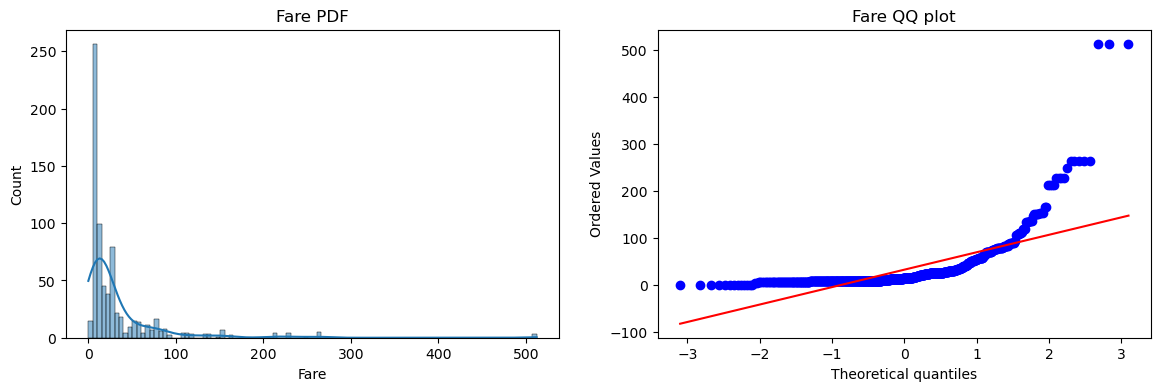

In [56]:
# FARE
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.histplot(x_train['Fare'], kde=True)
plt.title('Fare PDF')

plt.subplot(122)
stats.probplot(x_train['Fare'], dist='norm', plot=plt)
plt.title('Fare QQ plot')

plt.show()

This is a Right-Skewd Data, and hence we should use Log() transform

In [57]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# create objects for both models
clf = LogisticRegression()
clf1 = DecisionTreeClassifier()

In [58]:
clf.fit(x_train, y_train)
clf1.fit(x_train, y_train)

y_pred = clf.predict(x_test)
y_pred1 = clf1.predict(x_test)

# get the accuracy of both the models
print("Accuracy LR", accuracy_score(y_test, y_pred))
print("Accuracy DT", accuracy_score(y_test, y_pred1))

Accuracy LR 0.6480446927374302
Accuracy DT 0.6703910614525139


Now we will perform Log-Transform on both the models, and see if it affects the accuracy...

In [59]:
from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer

In [60]:
# create objects
trf = FunctionTransformer(func=np.log1p)
# log1p means it reaturns the log of (1+number)

In [61]:
x_train_transformed = trf.fit_transform(x_train)
x_test_transformed = trf.fit_transform(x_test)
# with this the data in the columns is coverted

In [62]:
clf = LogisticRegression()
clf1 = DecisionTreeClassifier()

clf.fit(x_train_transformed, y_train)
clf1.fit(x_train_transformed, y_train)

y_pred = clf.predict(x_test_transformed)
y_pred1 = clf1.predict(x_test_transformed)

print("Accuracy LR", accuracy_score(y_test, y_pred))
print("Accuracy DI", accuracy_score(y_test, y_pred1))

Accuracy LR 0.6815642458100558
Accuracy DI 0.6703910614525139


Note : The accuracy of Decision Tree Model did not change much, but the Linear Regression Model imporved in accuracy.

### Cross Validation

We'll just transform the entire 'x' dataset(this is the input) and try Cross Validation.

In [63]:
from sklearn.model_selection import cross_val_score

In [65]:
x_transformed = trf.fit_transform(x)

clf = LogisticRegression()
clf1 = DecisionTreeClassifier()

print("LR", np.mean(cross_val_score(clf, x_transformed, y, scoring='accuracy', cv=10)))
print("DT", np.mean(cross_val_score(clf1, x_transformed, y, scoring='accuracy', cv=10)))

LR 0.678027465667915
DT 0.6599375780274656


Since we are seeing this improvement even after performing this multiple times and taking a mean, this must mean that there is in fact an improvement!!

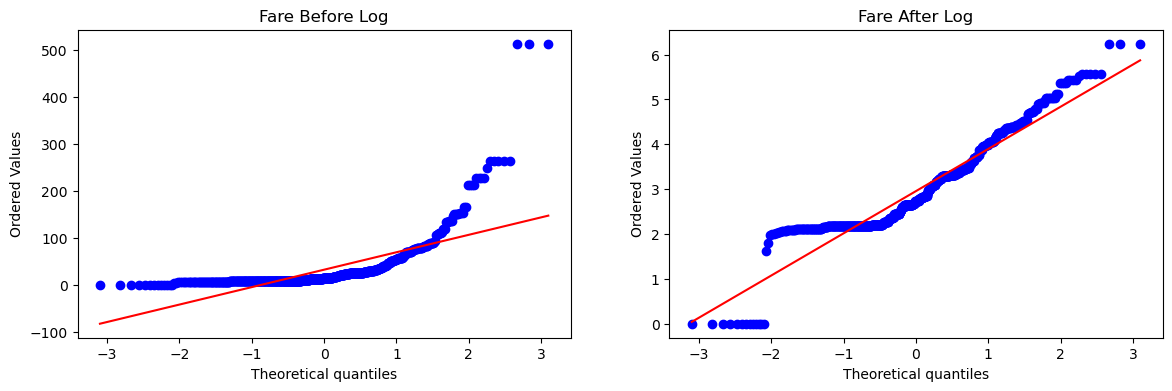

In [72]:
# plot the datasets before and after the Transformation!!
plt.figure(figsize=(14,4))

plt.subplot(121)
stats.probplot(x_train['Fare'], dist='norm', plot=plt)
plt.title('Fare Before Log')

plt.subplot(122)
stats.probplot(x_train_transformed['Fare'], dist='norm', plot=plt)
plt.title('Fare After Log')

plt.show()
# note that the plot improved after the tranform....

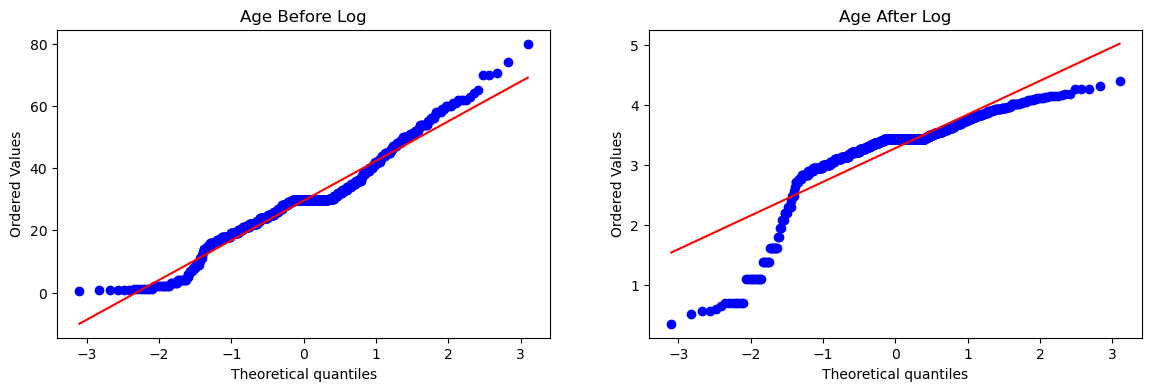

In [74]:
# plot the datasets before and after the Transformation!!
plt.figure(figsize=(14,4))

plt.subplot(121)
stats.probplot(x_train['Age'], dist='norm', plot=plt)
plt.title('Age Before Log')

plt.subplot(122)
stats.probplot(x_train_transformed['Age'], dist='norm', plot=plt)
plt.title('Age After Log')

plt.show()
# note that the plot worsened after the transform

Now, how about transforming only the 'Fare' Column??

In [78]:
trf2 = ColumnTransformer([
    ('log', FunctionTransformer(np.log1p), ['Fare'])
], remainder='passthrough')
# remember columntransformer takes a list of tuples as parameter

x_train_transformed2 = trf2.fit_transform(x_train)
x_test_transformed2 = trf2.fit_transform(x_test)

In [81]:
# doing it all over again
clf = LogisticRegression()
clf1 = DecisionTreeClassifier()

clf.fit(x_train_transformed2, y_train)
clf1.fit(x_train_transformed2, y_train)

y_pred = clf.predict(x_test_transformed2)
y_pred1 = clf1.predict(x_test_transformed2)

print('Accuracy LR', accuracy_score(y_test, y_pred))
print('Accuracy DT', accuracy_score(y_test, y_pred1))

Accuracy LR 0.6703910614525139
Accuracy DT 0.6759776536312849


This time it improved both!!

In [83]:
x_transformed2 = trf2.fit_transform(x)

clf = LogisticRegression()
clf1 = DecisionTreeClassifier()


print("LR", np.mean(cross_val_score(clf, x_transformed2, y, scoring='accuracy', cv=10)))
print("DT", np.mean(cross_val_score(clf1, x_transformed2, y, scoring='accuracy', cv=10)))

LR 0.6712609238451936
DT 0.6599500624219725


Making a custom function for transform!!

In [87]:
def apply_transform(transform):
    # create input and output
    x = df.iloc[:, 1:3]
    y = df.iloc[:, 0]

    # transform object
    trf = ColumnTransformer([
        ('log', FunctionTransformer(transform), ['Fare'])
    ], remainder='passthrough')
    # note that the function for transform is an input paramter!!!

    # transform fare column
    x_trans = trf.fit_transform(x)
    
    # create the LR model and cross verify it
    clf = LogisticRegression()
    print("Accuracy", np.mean(cross_val_score(clf, x_trans, y, scoring='accuracy', cv=10)))

    # plotting before and after graphs
    plt.figure(figsize=(14,4))

    plt.subplot(121)
    stats.probplot(x['Fare'], dist='norm', plot=plt)
    plt.title('Fare Before Transform')

    plt.subplot(122)
    stats.probplot(x_trans[:, 0], dist='norm', plot=plt)
    plt.title('Fare After Transform')

    plt.show()

Accuracy 0.6589013732833957


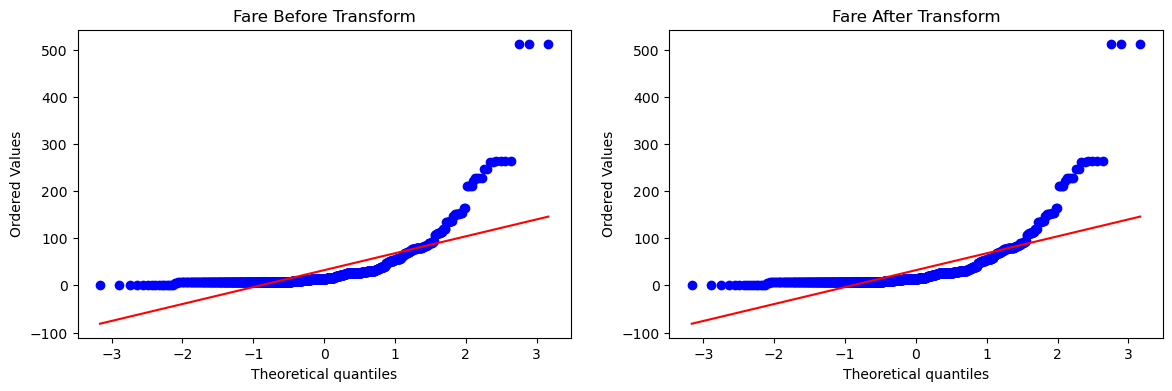

In [89]:
# now we can try out custom functions
apply_transform(lambda x: x)

Accuracy 0.6442446941323345


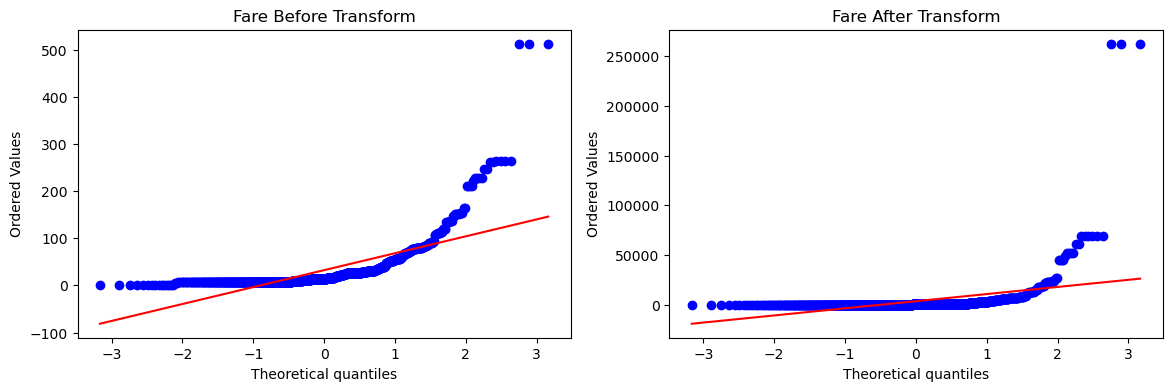

In [91]:
apply_transform(lambda x: x**2)

Accuracy 0.6589013732833957


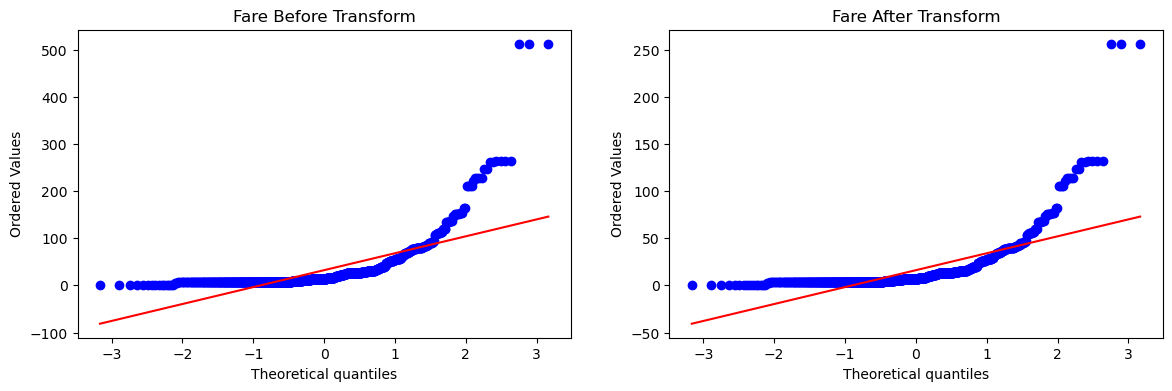

In [93]:
apply_transform(lambda x: x**1/2)

Accuracy 0.61729088639201


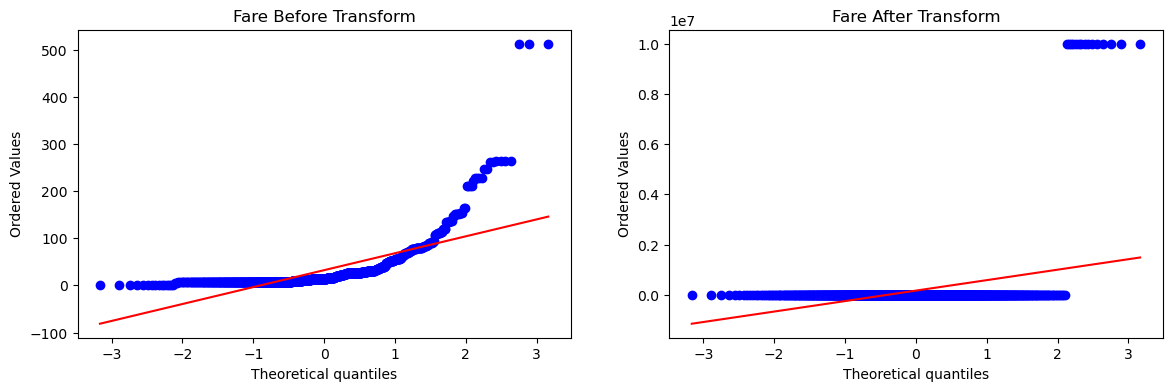

In [97]:
apply_transform(lambda x: 1/(0.0000001 + x))

Accuracy 0.6195131086142323


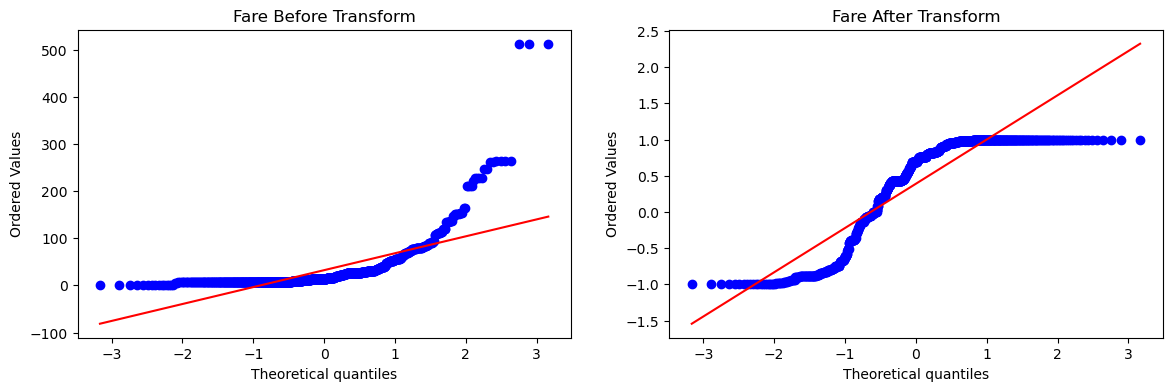

In [98]:
apply_transform(np.sin)